In [32]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# read pickle file
with open('../tracker_stubs/ball_detections.pkl' , 'rb') as f:
    ball_positions = pickle.load(f)

In [34]:
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1','y1','x2','y2'])

#interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]


In [39]:
ball_positions = [x.get(1,[]) for x in ball_positions]

df_ball_positions = pd.DataFrame(ball_positions, columns=['x1','y1','x2','y2'])
df_ball_positions['ball_hit'] = 0 

df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center= False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

print(df_ball_positions)
minimum_change_frames_hit = 25
for i in range(1, len(df_ball_positions)- int(minimum_change_frames_hit*1.2)):
    negative_position_change =df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_hit*1.2)+1):
            negative_position_change_following_frame =df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame :
                change_count += 1
            elif  positive_position_change_following_frame and positive_position_change:
                change_count += 1
        if change_count > minimum_change_frames_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_list = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

     x1  y1  x2  y2  ball_hit  mid_y  mid_y_rolling_mean  delta_y
0   NaN NaN NaN NaN         0    NaN                 NaN      NaN
1   NaN NaN NaN NaN         0    NaN                 NaN      NaN
2   NaN NaN NaN NaN         0    NaN                 NaN      NaN
3   NaN NaN NaN NaN         0    NaN                 NaN      NaN
4   NaN NaN NaN NaN         0    NaN                 NaN      NaN
..   ..  ..  ..  ..       ...    ...                 ...      ...
209 NaN NaN NaN NaN         0    NaN                 NaN      NaN
210 NaN NaN NaN NaN         0    NaN                 NaN      NaN
211 NaN NaN NaN NaN         0    NaN                 NaN      NaN
212 NaN NaN NaN NaN         0    NaN                 NaN      NaN
213 NaN NaN NaN NaN         0    NaN                 NaN      NaN

[214 rows x 8 columns]


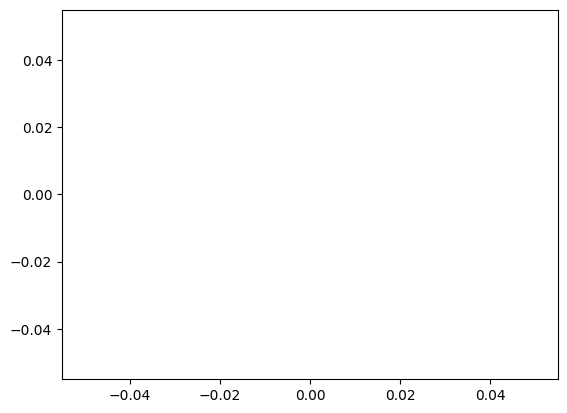

In [36]:
# plot roling mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])


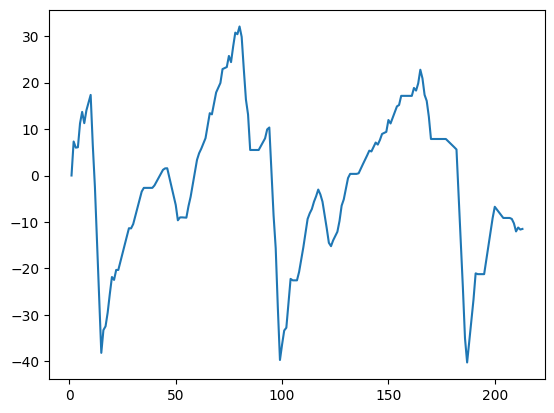

In [13]:
plt.plot(df_ball_positions['delta_y'])


In [14]:
df_ball_positions['ball_hit'] = 0 

In [24]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center= False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

minimum_change_frames_hit = 25
for i in range(1, len(df_ball_positions)- int(minimum_change_frames_hit*1.2)):
    negative_position_change =df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_hit*1.2)+1):
            negative_position_change_following_frame =df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame :
                change_count += 1
            elif  positive_position_change_following_frame and positive_position_change:
                change_count += 1
        if change_count > minimum_change_frames_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_list = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()


C:\Users\HP Spectre\AppData\Local\Temp\ipykernel_13524\2327333954.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\HP Spectre\AppData\Local\Temp\ipykernel_13524\2327333954.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\HP Spectre\AppData\Local\Temp\ipykernel_13524\2327333954.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,776.865967,717.330017,796.806519,738.393188,727.861603,735.918115,6.523407,1
58,925.881409,240.971042,939.039478,253.989072,247.480057,243.406100,-1.957851,1
95,624.777130,748.891968,642.157227,766.698242,757.795105,775.403400,0.871759,1
131,716.963562,229.095016,729.239868,242.786247,235.940632,235.241678,-0.557163,1
182,1294.891235,739.127197,1314.160156,760.564819,749.846008,738.733578,5.602832,1
